# Классификация

## Числа в вероятности

In [1]:
import numpy as np

def normalize(x: np.ndarray) -> np.ndarray:
    return x / np.sum(x)

In [2]:
normalize([1, 2, 3]) # type: ignore

array([0.16666667, 0.33333333, 0.5       ])

In [3]:
normalize([1, 1, 1]) # type: ignore

array([0.33333333, 0.33333333, 0.33333333])

In [4]:
normalize([1, -2, 0]) # type: ignore

array([-1.,  2., -0.])

In [5]:
def softmax(x: np.ndarray) -> np.ndarray:
    exp_x = np.exp(np.clip(x, -50, 50))
    return exp_x / np.sum(exp_x)

In [6]:
softmax([1, 2, 3]) # type: ignore

array([0.09003057, 0.24472847, 0.66524096])

In [7]:
softmax([1, -2, 0]) # type: ignore

array([0.70538451, 0.03511903, 0.25949646])

In [8]:
print(normalize([5, 3, 2])) # type: ignore
print(softmax([5, 3, 2])) # type: ignore

[0.5 0.3 0.2]
[0.84379473 0.1141952  0.04201007]


$$
\hat{y} = [p_1, p_2, ..., p_n]
$$
$$
y_{true} = [0, 0, ..., 1, ..., 0]
$$

$$
CrossEntropy(p, y) = -\sum_{i = 1}^{n}(y_i*\log{p_i} + (1 - y_i)*\log{(1 - p_i)})
$$

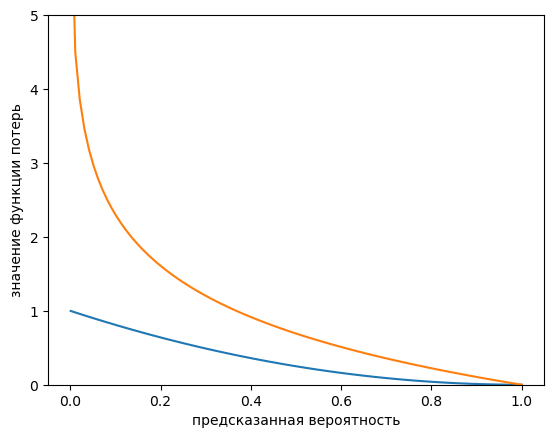

In [9]:
import matplotlib.pyplot as plt

# y_true = 1
p = np.linspace(0.001, 1, 100)
mse = (1 - p)**2
csl = -np.log(p)

plt.plot(p, mse)
plt.plot(p, csl)
plt.ylim(0, 5)
plt.xlabel('предсказанная вероятность')
plt.ylabel('значение функции потерь')
plt.show()

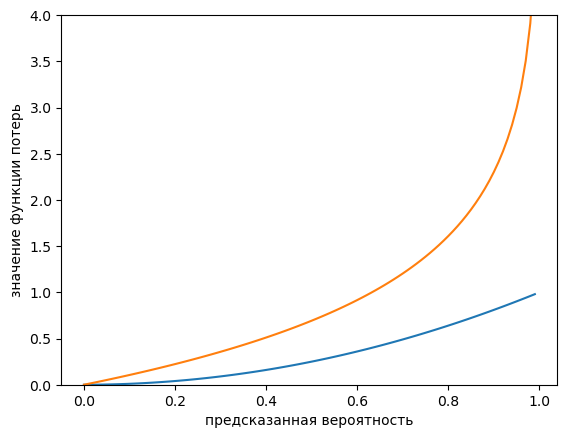

In [10]:
p = np.linspace(0, 0.99, 100)
mse = (p)**2
csl = -np.log(1 - p)

plt.plot(p, mse)
plt.plot(p, csl)
plt.ylim(0, 4)
plt.xlabel('предсказанная вероятность')
plt.ylabel('значение функции потерь')
plt.show()

$$
(softmax)crossentropy(x_i) = -(y_i)*log(\frac{e^{x_i}}{\sum{e^{x_k}}}) - (1 - y_i)*log(1 - \frac{e^{x_i}}{\sum{e^{x_k}}})
$$

$$
\frac{dscrossentropy(p_i)}{dp_i} = -y_i+(\frac{e^{x_i}}{\sum{e^{x_k}}})
$$

In [11]:
import sys
sys.modules.pop('NN', 'q')
from NN import *

In [12]:
class SoftmaxCrossEntropyLoss(Loss):
    def __init__(self):
        self.epsilon = 1e-7
    def _output(self):
        softmax_pred = np.array([softmax(row) for row in self.prediction])
        self.softmax = np.clip(softmax_pred, self.epsilon, 1 - self.epsilon)
        return np.sum(-self.target*np.log(self.softmax))
    def prediction_diff(self):
        return (self.softmax - self.target).T

In [13]:
class Tanh(Operation):
    def _output(self):
        clipped_input = np.clip(self.input_, -50, 50)
        exp_2x = np.exp(2 * clipped_input)
        return (exp_2x - 1) / (exp_2x + 1)
    
    def _input_diff(self, output_diff_):
        return (output_diff_ * (1 - np.square(self.output_)).T)

## Тестирование на MNIST

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

In [15]:
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=19)

In [19]:
Net = NeuralNetwork([Dense(neurons=90, activation=Sigmoid),
                    Dense(neurons = 10, activation = None)]) # type: ignore

In [20]:
def propab_to_labels(X_pred):
    return np.argmax(X_pred, axis=1)

def accuracy_trainer(trainer, X_test, y_test):
    print("=" * 20, "ACCURACY", "="*20, sep="")
    print(accuracy_score(np.argmax(y_test, axis=1), propab_to_labels(trainer.score(X_test))))

In [21]:
trainer = Trainer(MSE(), Net, SGD())

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

In [25]:
trainer.fit(X_train, y_train, epochs=50, batch_size=50)

Epoch 1: loss = 0.14095489127769056
Epoch 2: loss = 0.0790961163139307
Epoch 3: loss = 0.05714001243254921
Epoch 4: loss = 0.04245238310153108
Epoch 5: loss = 0.03195117111822084
Epoch 6: loss = 0.024246094940312178
Epoch 7: loss = 0.018518908153733273
Epoch 8: loss = 0.014230628512328944
Epoch 9: loss = 0.011003292884352622
Epoch 10: loss = 0.008567665659357107
Epoch 11: loss = 0.006725191827872625
Epoch 12: loss = 0.005329456040459929
Epoch 13: loss = 0.004271441308416532
Epoch 14: loss = 0.00346922702596862
Epoch 15: loss = 0.0028610740323414875
Epoch 16: loss = 0.002400379952261331
Epoch 17: loss = 0.0020516960022162016
Epoch 18: loss = 0.0017880799865874408
Epoch 19: loss = 0.0015890026913017899
Epoch 20: loss = 0.001438803644753441
Epoch 21: loss = 0.0013255065916926785
Epoch 22: loss = 0.0012399622089396246
Epoch 23: loss = 0.0011752080565804353
Epoch 24: loss = 0.001125991306226637
Epoch 25: loss = 0.0010883447962223454
Epoch 26: loss = 0.0010592914795201028
Epoch 27: loss = 0.

In [26]:
accuracy_trainer(trainer, X_test, y_test)

====================ACCURACY====================
0.8224


In [27]:
Net_Tanh = NeuralNetwork([Dense(neurons=90, activation=Tanh), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh = Trainer(MSE(), Net_Tanh, SGD())

In [28]:
trainer_Tanh.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh, X_test, y_test)

Epoch 1: loss = 0.3481578602662239
Epoch 2: loss = 0.07426710772233665
Epoch 3: loss = 0.020930535047135414
Epoch 4: loss = 0.0066617516140468425
Epoch 5: loss = 0.0026667050752711917
Epoch 6: loss = 0.0015324276562037164
Epoch 7: loss = 0.0012065722651286711
Epoch 8: loss = 0.001109942856551222
Epoch 9: loss = 0.001078628156319885
Epoch 10: loss = 0.00106615548483735
Epoch 11: loss = 0.001059259453926198
Epoch 12: loss = 0.0010541052934933011
Epoch 13: loss = 0.0010495614097695508
Epoch 14: loss = 0.0010452914914205371
Epoch 15: loss = 0.0010411872057046133
Epoch 16: loss = 0.0010372051316502786
Epoch 17: loss = 0.0010333333715241365
Epoch 18: loss = 0.0010295688733811216
Epoch 19: loss = 0.0010259053079101385
Epoch 20: loss = 0.0010223360616826462
Epoch 21: loss = 0.0010188563974522548
Epoch 22: loss = 0.0010154651287683435
Epoch 23: loss = 0.0010121654009492256
Epoch 24: loss = 0.001008954913131388
Epoch 25: loss = 0.0010058275453556146
Epoch 26: loss = 0.0010027790610963514
Epoch 2

In [29]:
Net_Tanh_SCS = NeuralNetwork([Dense(neurons=90, activation=Tanh), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS = Trainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS, SGD())

In [30]:
trainer_Tanh_SCS.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS, X_test, y_test)

Epoch 1: loss = 0.8435816916255714
Epoch 2: loss = 0.33177264538088475
Epoch 3: loss = 0.3040980151974887
Epoch 4: loss = 0.2930544665803305
Epoch 5: loss = 0.28638384370451764
Epoch 6: loss = 0.28512473745640127
Epoch 7: loss = 0.2823546435415007
Epoch 8: loss = 0.27956668099954596
Epoch 9: loss = 0.2775670847710989
Epoch 10: loss = 0.27683554921299225
Epoch 11: loss = 0.27626963194742254
Epoch 12: loss = 0.27499374151062234
Epoch 13: loss = 0.27371738620256186
Epoch 14: loss = 0.2724748555902478
Epoch 15: loss = 0.27270019777641624
Epoch 16: loss = 0.27242079555593945
Epoch 17: loss = 0.27184066899633746
Epoch 18: loss = 0.2710840528320716
Epoch 19: loss = 0.2696355344777385
Epoch 20: loss = 0.2697714473600371
Epoch 21: loss = 0.2698801530526096
Epoch 22: loss = 0.2697076462805981
Epoch 23: loss = 0.2695769480237894
Epoch 24: loss = 0.26934686193429247
Epoch 25: loss = 0.26843401988553756
Epoch 26: loss = 0.26777058935653314
Epoch 27: loss = 0.2672859223734901
Epoch 28: loss = 0.2669

In [31]:
class Impulse_SGD(Optimizer):

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.First = True
        
    def step(self):
        if self.First:
            self.prev_grads = [[np.zeros_like(oper) for oper in layer] for layer in self.net.get_params()]
            self.First = False
        for layer_params, layer_params_grad, prev_Layer_grad in zip(self.net.get_params(), self.net.get_params_grad(), self.prev_grads):
            for params, params_grad, prev_grad in zip(layer_params, layer_params_grad, prev_Layer_grad):
                grad = self.lr * params_grad - self.momentum*prev_grad
                params -= grad
                prev_grad[:] = grad

In [32]:
Net_Tanh_SCS_Impulse = NeuralNetwork([Dense(neurons=90, activation=Tanh), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS_Impulse = Trainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS_Impulse, Impulse_SGD(lr=0.01))

In [33]:
trainer_Tanh_SCS_Impulse.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS_Impulse, X_test, y_test)

Epoch 1: loss = 1.1501420885690914
Epoch 2: loss = 0.4233401893916031
Epoch 3: loss = 0.33883883469193915
Epoch 4: loss = 0.31780536414437816
Epoch 5: loss = 0.308926989145187
Epoch 6: loss = 0.2973876211323172
Epoch 7: loss = 0.29078792756708643
Epoch 8: loss = 0.29010565797645493
Epoch 9: loss = 0.284216331920255
Epoch 10: loss = 0.28203664892619845
Epoch 11: loss = 0.28328135934647947
Epoch 12: loss = 0.28293850053010283
Epoch 13: loss = 0.28104398980552825
Epoch 14: loss = 0.2793053748331525
Epoch 15: loss = 0.27832333883851285
Epoch 16: loss = 0.27534928513092494
Epoch 17: loss = 0.2717428022880171
Epoch 18: loss = 0.26921424450755943
Epoch 19: loss = 0.26812044183285005
Epoch 20: loss = 0.2654485470333886
Epoch 21: loss = 0.2640047667112273
Epoch 22: loss = 0.2636261296798114
Epoch 23: loss = 0.2636067383520765
Epoch 24: loss = 0.2638908452389932
Epoch 25: loss = 0.2647702765724615
Epoch 26: loss = 0.26571999210700453
Epoch 27: loss = 0.26459172180318746
Epoch 28: loss = 0.263563

In [34]:
class DecaySGD(SGD):
    def __init__(self, start_lr = 0.1, final_lr = 0.01, decay_type='exponential'):
        self.start_lr = start_lr
        self.final_lr = final_lr
        self.decay_type = decay_type
        self.lr = self.start_lr
    
    def _setup_decay(self, epoch_count):
        if self.decay_type == 'linear':
            self.decay_per_epoch = (self.start_lr - self.final_lr) / epoch_count
        else:
            self.decay_per_epoch = np.power(self.final_lr / self.lr, 1 / (epoch_count))
    
    def _decay(self):
        if self.decay_type == 'linear':
            self.lr -= self.decay_per_epoch
        else:
            self.lr *= self.decay_per_epoch

In [35]:
class DecayTrainer(Trainer):

    def fit(self, x_train, y_train, epochs = 100, verbose=True, batch_size = None):

        np.random.seed(10)

        indices = np.random.permutation(x_train.shape[0])
        x_train = x_train[indices]
        y_train = y_train[indices]

        if batch_size is None:
            batch_size = x_train.shape[0] // 5
        
        if isinstance(self.optimizer, DecaySGD):
            self.optimizer._setup_decay(epochs)

        for e in range(epochs):
            all_loss = 0
            for x_batch, y_batch in self.get_batch(x_train, y_train, batch_size):
                pred = self.Net.forward(x_batch)
                loss = self.loss.forward(y_batch, pred)
                all_loss += loss
                loss_grad = self.loss.backward()
                self.Net.backward(loss_grad)
                self.optimizer.step()
            if isinstance(self.optimizer, DecaySGD):
                self.optimizer._decay()
            if verbose:
                print(f'Epoch {e + 1}: loss = {all_loss / x_train.shape[0]}, lr = {self.optimizer.lr}')

In [36]:
Net_Tanh_SCS_Impulse_Decay_Exp = NeuralNetwork([Dense(neurons=90, activation=Tanh), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS_Impulse_Decay_Exp = DecayTrainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS_Impulse_Decay_Exp, 
                                        DecaySGD(decay_type="exponential", start_lr=0.02, final_lr=0.005))
trainer_Tanh_SCS_Impulse_Decay_Exp.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS_Impulse_Decay_Exp, X_test, y_test)

Epoch 1: loss = 0.6764125688197509, lr = 0.01945309894824571
Epoch 2: loss = 0.3572868641386185, lr = 0.01892115293451192
Epoch 3: loss = 0.3419379841999758, lr = 0.0184037530124975
Epoch 4: loss = 0.32852134103506625, lr = 0.01790050141855945
Epoch 5: loss = 0.31742525089032886, lr = 0.017411011265922486
Epoch 6: loss = 0.3086938435406695, lr = 0.016934906247250546
Epoch 7: loss = 0.3052743339231617, lr = 0.016471820345351464
Epoch 8: loss = 0.30131612415001147, lr = 0.016021397551792445
Epoch 9: loss = 0.2981564694763028, lr = 0.015583291593210001
Epoch 10: loss = 0.29308953800241494, lr = 0.015157165665103984
Epoch 11: loss = 0.29119815278875005, lr = 0.014742692172911015
Epoch 12: loss = 0.28805660630468116, lr = 0.014339552480158278
Epoch 13: loss = 0.2870899467518226, lr = 0.013947436663504058
Epoch 14: loss = 0.2855252731664416, lr = 0.013566043274476722
Epoch 15: loss = 0.28336065118207937, lr = 0.013195079107728946
Epoch 16: loss = 0.28085042669830107, lr = 0.01283425897562904

In [37]:
Net_Tanh_SCS_Impulse_Decay_Lin = NeuralNetwork([Dense(neurons=90, activation=Tanh), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS_Impulse_Decay_Lin = DecayTrainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS_Impulse_Decay_Lin, 
                                        DecaySGD(decay_type="linear", start_lr=0.02, final_lr=0.005))
trainer_Tanh_SCS_Impulse_Decay_Lin.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS_Impulse_Decay_Lin, X_test, y_test)

Epoch 1: loss = 0.6764125688197509, lr = 0.0197
Epoch 2: loss = 0.3588672999393437, lr = 0.019399999999999997
Epoch 3: loss = 0.3441928288024072, lr = 0.019099999999999995
Epoch 4: loss = 0.3316967099254246, lr = 0.018799999999999994
Epoch 5: loss = 0.3214871285604178, lr = 0.018499999999999992
Epoch 6: loss = 0.31592818191738875, lr = 0.01819999999999999
Epoch 7: loss = 0.31171010343034145, lr = 0.01789999999999999
Epoch 8: loss = 0.30789327652959014, lr = 0.017599999999999987
Epoch 9: loss = 0.3034261309406962, lr = 0.017299999999999986
Epoch 10: loss = 0.30355060289987695, lr = 0.016999999999999984
Epoch 11: loss = 0.30039668705279005, lr = 0.016699999999999982
Epoch 12: loss = 0.29903741130979056, lr = 0.01639999999999998
Epoch 13: loss = 0.29536355303939926, lr = 0.01609999999999998
Epoch 14: loss = 0.29296578182951255, lr = 0.015799999999999977
Epoch 15: loss = 0.2923736845340153, lr = 0.015499999999999977
Epoch 16: loss = 0.2884662478224122, lr = 0.015199999999999977
Epoch 17: l

In [38]:
X_test[0].shape

(784,)

In [39]:
class GlorotDense(Dense):

    def setup_layer(self, shape):
        W = np.random.randn(shape[1], self.neurons) * (2 / (shape[1] + self.neurons))
        B = np.random.randn(1, self.neurons) * (2 / (shape[1] + self.neurons))
        if self.activation is not None:
            self.operations = [WeightMultiply(W),
                              BiasAdd(B),
                              self.activation()]
        else:
            self.operations = [WeightMultiply(W),
                              BiasAdd(B)]

In [40]:
Net_Tanh_SCS_Glorot_Decay_Lin = NeuralNetwork([GlorotDense(neurons=90, activation=Tanh), # type: ignore
                    GlorotDense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS_Glorot_Decay_Lin = DecayTrainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS_Glorot_Decay_Lin, 
                                        DecaySGD(decay_type="linear", start_lr=0.02, final_lr=0.005))
trainer_Tanh_SCS_Glorot_Decay_Lin.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS_Glorot_Decay_Lin, X_test, y_test)

Epoch 1: loss = 0.4581550889378087, lr = 0.0197
Epoch 2: loss = 0.3797274058426159, lr = 0.019399999999999997
Epoch 3: loss = 0.3577286446204266, lr = 0.019099999999999995
Epoch 4: loss = 0.3422910434639735, lr = 0.018799999999999994
Epoch 5: loss = 0.3311409551629349, lr = 0.018499999999999992
Epoch 6: loss = 0.32240432770657673, lr = 0.01819999999999999
Epoch 7: loss = 0.3164224652143441, lr = 0.01789999999999999
Epoch 8: loss = 0.3148544379216932, lr = 0.017599999999999987
Epoch 9: loss = 0.3118304045923276, lr = 0.017299999999999986
Epoch 10: loss = 0.3078899157902094, lr = 0.016999999999999984
Epoch 11: loss = 0.30647463619182647, lr = 0.016699999999999982
Epoch 12: loss = 0.3010751198593103, lr = 0.01639999999999998
Epoch 13: loss = 0.29763495150992153, lr = 0.01609999999999998
Epoch 14: loss = 0.2940709222092846, lr = 0.015799999999999977
Epoch 15: loss = 0.29165651290355027, lr = 0.015499999999999977
Epoch 16: loss = 0.2912842995984623, lr = 0.015199999999999977
Epoch 17: loss 

In [41]:
class Dropout(Operation):
    def __init__(self, keep_prob = 0.7):
        super().__init__()
        self.keep_prob = keep_prob
    
    def _output(self, inference = False): # type: ignore
        if inference:
            return self.input_ * self.keep_prob
        else:
            self.mask = np.random.binomial(1, self.keep_prob, size=self.input_)
            return self.input_ * self.mask

In [42]:
Net_Tanh_SCS_Glorot_Decay_Lin = NeuralNetwork([GlorotDense(neurons=90, activation=Tanh), # type: ignore
                    GlorotDense(neurons = 10, activation = None)]) # type: ignore
trainer_Tanh_SCS_Glorot_Decay_Lin = DecayTrainer(SoftmaxCrossEntropyLoss(), Net_Tanh_SCS_Glorot_Decay_Lin, 
                                        DecaySGD(decay_type="linear", start_lr=0.02, final_lr=0.005))
trainer_Tanh_SCS_Glorot_Decay_Lin.fit(X_train, y_train, epochs=50, batch_size=50)
accuracy_trainer(trainer_Tanh_SCS_Glorot_Decay_Lin, X_test, y_test)

Epoch 1: loss = 0.4581550889378087, lr = 0.0197
Epoch 2: loss = 0.3797274058426159, lr = 0.019399999999999997
Epoch 3: loss = 0.3577286446204266, lr = 0.019099999999999995
Epoch 4: loss = 0.3422910434639735, lr = 0.018799999999999994
Epoch 5: loss = 0.3311409551629349, lr = 0.018499999999999992
Epoch 6: loss = 0.32240432770657673, lr = 0.01819999999999999
Epoch 7: loss = 0.3164224652143441, lr = 0.01789999999999999
Epoch 8: loss = 0.3148544379216932, lr = 0.017599999999999987
Epoch 9: loss = 0.3118304045923276, lr = 0.017299999999999986
Epoch 10: loss = 0.3078899157902094, lr = 0.016999999999999984
Epoch 11: loss = 0.30647463619182647, lr = 0.016699999999999982
Epoch 12: loss = 0.3010751198593103, lr = 0.01639999999999998
Epoch 13: loss = 0.29763495150992153, lr = 0.01609999999999998
Epoch 14: loss = 0.2940709222092846, lr = 0.015799999999999977
Epoch 15: loss = 0.29165651290355027, lr = 0.015499999999999977
Epoch 16: loss = 0.2912842995984623, lr = 0.015199999999999977
Epoch 17: loss 

In [ ]:
from NN2 import *

In [92]:
from NN2 import *
NN2_Net = NeuralNetwork([Dense(neurons=90, activation=Tanh, dropout=0.8), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
Trainer_NN2_Net = Trainer(SoftmaxCrossEntropyLoss(), NN2_Net,  # type: ignore
                                        IDSGD(decay_type="linear", lr=0.01))
Trainer_NN2_Net.fit(X_train, y_train, epochs=50, batch_size=50)

Epoch 1: loss = 1.2428127162707838, lr = 0.014799999999999999
Epoch 2: loss = 0.4235137748505211, lr = 0.014599999999999998
Epoch 3: loss = 0.38121658190541624, lr = 0.014399999999999998
Epoch 4: loss = 0.3607983004556472, lr = 0.014199999999999997
Epoch 5: loss = 0.33882505745044167, lr = 0.013999999999999997
Epoch 6: loss = 0.3406806806148024, lr = 0.013799999999999996
Epoch 7: loss = 0.3235868665315951, lr = 0.013599999999999996
Epoch 8: loss = 0.3178886757771222, lr = 0.013399999999999995


KeyboardInterrupt: 

In [93]:
Trainer_NN2_Net.eval()
accuracy_trainer(Trainer_NN2_Net, X_test, y_test)

0.9134285714285715

In [96]:
NN2_Net2 = NeuralNetwork([Dense(neurons=90, activation=Tanh, dropout=0.8), # type: ignore
                          Dense(neurons=45, activation=Tanh, dropout=0.8), # type: ignore
                    Dense(neurons = 10, activation = None)]) # type: ignore
Trainer_NN2_Net2 = Trainer(SoftmaxCrossEntropyLoss(), NN2_Net2,  # type: ignore
                                        IDSGD(decay_type="exponential", lr=0.07, momentum=0.1))
Trainer_NN2_Net2.fit(X_train, y_train, epochs=100, batch_size=50)
Trainer_NN2_Net2.eval()
accuracy_trainer(Trainer_NN2_Net2, X_test, y_test)

Epoch 1: loss = 1.1797231336510365, lr = 0.10385277043807793
Epoch 2: loss = 0.7912577879273157, lr = 0.10271807550156298
Epoch 3: loss = 0.7231591154098651, lr = 0.10159577823719025
Epoch 4: loss = 0.7062562777329997, lr = 0.10048574318804564
Epoch 5: loss = 0.6788966704673359, lr = 0.09938783637721672
Epoch 6: loss = 0.6614615255111937, lr = 0.09830192529162228
Epoch 7: loss = 0.6305869513918135, lr = 0.09722787886601843
Epoch 8: loss = 0.6226295469522499, lr = 0.09616556746717962
Epoch 9: loss = 0.620890979355283, lr = 0.09511486287825238
Epoch 10: loss = 0.6112319611676069, lr = 0.09407563828328004
Epoch 11: loss = 0.5979222493721641, lr = 0.09304776825189655
Epoch 12: loss = 0.5859822279488889, lr = 0.0920311287241875
Epoch 13: loss = 0.5740795751836604, lr = 0.09102559699571662
Epoch 14: loss = 0.5639672006182486, lr = 0.09003105170271575
Epoch 15: loss = 0.5624024704466513, lr = 0.0890473728074368
Epoch 16: loss = 0.566135244836744, lr = 0.08807444158366358
Epoch 17: loss = 0.55

0.9067428571428572

In [100]:
Trainer_NN2_Net2.eval()
Trainer_NN2_Net2.score  = lambda X: Trainer_NN2_Net2.Net.forward(X)
accuracy_trainer(Trainer_NN2_Net2, X_test, y_test)

0.9067428571428572